In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# import relevant python modules for the analysis
import numpy as np 
import pandas as pd 

In [58]:
phones = pd.read_csv("./drive/My Drive/MLstart/phone prices/phone_dataset.csv",error_bad_lines=False)
phones.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 821: expected 40 fields, saw 41\nSkipping line 6060: expected 40 fields, saw 41\nSkipping line 6663: expected 40 fields, saw 41\n'


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


In [59]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               8628 non-null   object 
 1   model               8628 non-null   object 
 2   network_technology  8628 non-null   object 
 3   2G_bands            8628 non-null   object 
 4   3G_bands            4856 non-null   object 
 5   4G_bands            1603 non-null   object 
 6   network_speed       4883 non-null   object 
 7   GPRS                8596 non-null   object 
 8   EDGE                8605 non-null   object 
 9   announced           8613 non-null   object 
 10  status              8628 non-null   object 
 11  dimentions          8609 non-null   object 
 12  weight_g            7679 non-null   object 
 13  weight_oz           7679 non-null   object 
 14  SIM                 8627 non-null   object 
 15  display_type        8624 non-null   object 
 16  displa

In [60]:
#cols to be used
cols = ['brand','model', 'GPRS', 'EDGE', 'status', 'dimentions', 'SIM', 'display_type',
                    'display_resolution', 'display_size', 'OS', 'CPU', 'Chipset', 'GPU', 'memory_card',
                    'internal_memory', 'RAM', 'primary_camera', 'secondary_camera', 'WLAN', 'bluetooth',
                    'GPS', 'sensors', 'battery', 'colors', 'approx_price_EUR']

In [61]:
#Creating a copy of the phone dataset with selected features and target
data = phones[cols]
data.head(20)

,brand,model,GPRS,EDGE,status,dimentions,SIM,display_type,display_resolution,display_size,...,RAM,primary_camera,secondary_camera,WLAN,bluetooth,GPS,sensors,battery,colors,approx_price_EUR
0,Acer,Iconia Talk S,Yes,Yes,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),...,2 GB RAM,13 MP| autofocus,2 MP| 720p,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0
1,Acer,Liquid Z6 Plus,Yes,Yes,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),...,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0
2,Acer,Liquid Z6,Yes,Yes,Available. Released 2016 December,-,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),...,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes with A-GPS,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0
3,Acer,Iconia Tab 10 A3-A40,No,No,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),...,2 GB RAM,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,Accelerometer,Non-removable Li-Ion battery,Black,230.0
4,Acer,Liquid X2,Yes,Yes,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),...,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0
5,Acer,Liquid Jade 2,Yes,Yes,Available,-,Dual SIM (Nano-SIM| dual stand-by),Super AMOLED capacitive touchscreen 16M colors,5.5 inches,1080 x 1920 pixels (~401 ppi pixel density),...,3 GB RAM,21 MP| autofocus| dual-LED flash,8 MP,Wi-Fi 802.11 a/b/g/n/ac| dual-band| Wi-Fi Dire...,4.0| A2DP| LE,Yes with A-GPS,Accelerometer| gyro| proximity| compass,NaN,Black,NaN
6,Acer,Liquid Zest Plus,Yes,Yes,Available. Released 2016 July,154 x 77 x 10 mm (6.06 x 3.03 x 0.39 in),Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~70.3% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),...,2 GB RAM,13 MP| phase detection/laser autofocus| LED flash,5 MP,Yes,Yes,Yes with A-GPS,Accelerometer| proximity| compass,Non-removable Li-Ion 5000 mAh battery,Blue| White,200.0
7,Acer,Liquid Zest,Yes,Yes,Available. Released 2016 April,145.7 x 71.2 x 8.4 mm (5.74 x 2.80 x 0.33 in),Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches (~66.4% screen-to-body ratio),720 x 1280 pixels (~294 ppi pixel density),...,1 GB RAM,8 MP| f/2.0| autofocus| LED flash,5 MP,Yes,4.0| A2DP,Yes with A-GPS,Accelerometer| proximity| compass,Removable Li-Ion 2000 mAh battery,Black| White,110.0
8,Acer,Predator 8,No,No,Available. Released 2015 November,217.9 x 127 x 8.6 mm (8.58 x 5.0 x 0.34 in),No,IPS LCD capacitive touchscreen 16M colors,8.0 inches (~67.1% screen-to-body ratio),1920 x 1200 pixels (~283 ppi pixel density),...,2 GB RAM,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n,4.0| A2DP| LE,NaN,Yes,Non-removable Li-Po 4420 mAh battery,Black/Silver,350.0
9,Acer,Liquid Ja

In [62]:
#number of unique values in each column
for col in data.columns:
    print(col, ':', data[col].nunique(), 'labels')

brand : 108 labels
model : 8273 labels
GPRS : 53 labels
EDGE : 51 labels
status : 135 labels
dimentions : 6607 labels
SIM : 85 labels
display_type : 233 labels
display_resolution : 2978 labels
display_size : 861 labels
OS : 550 labels
CPU : 556 labels
Chipset : 536 labels
GPU : 138 labels
memory_card : 203 labels
internal_memory : 395 labels
RAM : 209 labels
primary_camera : 671 labels
secondary_camera : 368 labels
WLAN : 173 labels
bluetooth : 110 labels
GPS : 94 labels
sensors : 113 labels
battery : 1048 labels
colors : 2612 labels
approx_price_EUR : 109 labels


In [63]:
from pandas import Series

#function to split '|' separated values into multiple rows
def split_column_data_to_multiple_rows(df, col):
    s = df[col].str.split('|').apply(Series, 1).stack()
    s.index = s.index.droplevel(-1)
    s.name = col
    
    new_df = add_new_col_to_df(df, col, s)
    
    return new_df

In [64]:
#function to replace new column with the old one of the same name
def add_new_col_to_df(df, col, s):
    del df[col]
    new_df = df.join(s)
    
    return new_df

In [65]:
#creating a separate shorter dataframe to keep things simpler
#keeping the columns I will be working on first, and will keep adding others on the way
data_copy = data.copy()
data_df_cols = ['brand','model', 'primary_camera', 'secondary_camera', 'WLAN', 'bluetooth', 'sensors',
               'colors', 'approx_price_EUR']
data_df = data_copy[data_df_cols]
data_df.head()

,brand,model,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,approx_price_EUR
0,Acer,Iconia Talk S,13 MP| autofocus,2 MP| 720p,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Accelerometer| proximity,Black,170.0
1,Acer,Liquid Z6 Plus,13 MP| autofocus| LED flash,5 MP,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Fingerprint (front-mounted)| accelerometer| pr...,Black| White,250.0
2,Acer,Liquid Z6,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Accelerometer| proximity,Black| White,120.0
3,Acer,Iconia Tab 10 A3-A40,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,Accelerometer,Black,230.0
4,Acer,Liquid X2,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Accelerometer| proximity| compass,Black| Gold,230.0


In [66]:
#Split and replace with new column values for Primary Camera Column
new_primary_camera_df = split_column_data_to_multiple_rows(data_df, 'primary_camera')
new_primary_camera_df.drop_duplicates(keep=False,inplace=True) 
new_primary_camera_df.head()

,brand,model,secondary_camera,WLAN,bluetooth,sensors,colors,approx_price_EUR,primary_camera
0,Acer,Iconia Talk S,2 MP| 720p,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Accelerometer| proximity,Black,170.0,13 MP
0,Acer,Iconia Talk S,2 MP| 720p,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Accelerometer| proximity,Black,170.0,autofocus
1,Acer,Liquid Z6 Plus,5 MP,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Fingerprint (front-mounted)| accelerometer| pr...,Black| White,250.0,13 MP
1,Acer,Liquid Z6 Plus,5 MP,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Fingerprint (front-mounted)| accelerometer| pr...,Black| White,250.0,autofocus
1,Acer,Liquid Z6 Plus,5 MP,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Fingerprint (front-mounted)| accelerometer| pr...,Black| White,250.0,LED flash


In [67]:
#Split and replace with new column values for Secondary Camera Column
new_secondary_camera_df = split_column_data_to_multiple_rows(new_primary_camera_df, 'secondary_camera')
new_secondary_camera_df.drop_duplicates(keep=False,inplace=True) 
new_secondary_camera_df.head()

,brand,model,WLAN,bluetooth,sensors,colors,approx_price_EUR,primary_camera,secondary_camera
3,Acer,Iconia Tab 10 A3-A40,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,Accelerometer,Black,230.0,5 MP,2 MP
8,Acer,Predator 8,Wi-Fi 802.11 a/b/g/n,4.0| A2DP| LE,Yes,Black/Silver,350.0,5 MP,2 MP
18,Acer,Iconia Tab 10 A3-A30,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,4.0| A2DP,Accelerometer,Various,250.0,5 MP,2 MP
19,Acer,Iconia One 8 B1-820,Wi-Fi 802.11 b/g/n,4.0| A2DP,Accelerometer,Various,180.0,5 MP,VGA
33,Acer,Liquid Z200,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP,Accelerometer,Titanium Black| Essential White| Fragrant Pink...,90.0,2 MP,No


In [68]:
#Split and replace with new column values for WLAN Column
new_WLAN_df = split_column_data_to_multiple_rows(new_secondary_camera_df, 'WLAN')
new_WLAN_df.drop_duplicates(keep=False,inplace=True) 
new_WLAN_df.head()

,brand,model,bluetooth,sensors,colors,approx_price_EUR,primary_camera,secondary_camera,WLAN
3,Acer,Iconia Tab 10 A3-A40,Yes,Accelerometer,Black,230.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n/ac
3,Acer,Iconia Tab 10 A3-A40,Yes,Accelerometer,Black,230.0,5 MP,2 MP,dual-band
3,Acer,Iconia Tab 10 A3-A40,Yes,Accelerometer,Black,230.0,5 MP,2 MP,hotspot
8,Acer,Predator 8,4.0| A2DP| LE,Yes,Black/Silver,350.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n
18,Acer,Iconia Tab 10 A3-A30,4.0| A2DP,Accelerometer,Various,250.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n/ac


In [69]:
#Split and replace with new column values for Bluetooth Column
new_bluetooth_df = split_column_data_to_multiple_rows(new_WLAN_df, 'bluetooth')
new_bluetooth_df.drop_duplicates(keep=False,inplace=True) 
new_bluetooth_df.head()

,brand,model,sensors,colors,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth
8,Acer,Predator 8,Yes,Black/Silver,350.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n,4.0
8,Acer,Predator 8,Yes,Black/Silver,350.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n,A2DP
8,Acer,Predator 8,Yes,Black/Silver,350.0,5 MP,2 MP,Wi-Fi 802.11 a/b/g/n,LE
19,Acer,Iconia One 8 B1-820,Accelerometer,Various,180.0,5 MP,VGA,Wi-Fi 802.11 b/g/n,4.0
19,Acer,Iconia One 8 B1-820,Accelerometer,Various,180.0,5 MP,VGA,Wi-Fi 802.11 b/g/n,A2DP


In [70]:
#Split and replace with new column values for Sensors Column
new_sensors_df = split_column_data_to_multiple_rows(new_bluetooth_df, 'sensors')
new_sensors_df.drop_duplicates(keep=False,inplace=True) 
new_sensors_df.head()

,brand,model,colors,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors
35,Acer,Iconia Tab 7 A1-713,Black,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer
36,Acer,Iconia Tab 7 A1-713HD,Black,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer
37,Acer,Iconia One 7 B1-730,Red| white| black| blue| pink,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer
41,Acer,Iconia B1-721,Black/Red,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer
88,Acer,beTouch E110,Black| Dark Blue,70.0,3.15 MP,No,No,2.0,NaN


In [71]:
#Split and replace with new column values for Colors Column
new_colors_df = split_column_data_to_multiple_rows(new_sensors_df, 'colors')
new_colors_df.drop_duplicates(keep=False,inplace=True) 
new_colors_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Red
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,white
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,black


In [72]:
#Bringig down internal memory column to the new dataframe for processing
new_df = new_colors_df.join(data_copy['internal_memory'])
new_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Red,8 GB
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,white,8 GB
37,Acer,Iconia One 7 B1-730,90.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,black,8 GB


In [73]:
#Split and replace with new column values for Internal Memory Column
new_internal_memory_df = split_column_data_to_multiple_rows(new_df, 'internal_memory')
new_internal_memory_df.drop_duplicates(keep=False,inplace=True) 
new_internal_memory_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN


In [74]:
#Now bringing down status from original dataframe and joining to the updated dataframe
status_df = new_internal_memory_df.join(data_copy['status'])
status_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,status
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available. Released 2014 August
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available. Released 2014 August
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,Available. Released 2014 January
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,Available. Released 2015
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,Available. Released 2015


In [75]:
#Splitting Status Column into multiple status related columns
split_data = status_df["status"].str.split(" ")
sdata = split_data.to_list()
names = ["release_status", "released", "release_year", 'release_day', 'release_month/quarter', 'release_hour', 'release_min']
new_split_df = pd.DataFrame(sdata, columns=names)
new_status_df = new_split_df.drop(['released', 'release_day', 'release_hour', 'release_min'], axis=1)
new_status_df.head(10)

,release_status,release_year,release_month/quarter
0,Available.,2014,August
1,Available.,2014,August
2,Available.,2014,January
3,Available.,2015,None
4,Available.,2015,None
5,Available.,2015,None
6,Available.,2015,None
7,Available.,2014,None
8,Available.,2014,None
9,Available.,2014,None


In [76]:
#The new dataframe contains newly created status related columns replacing the status column
#Notice that there is no status column
new_data_df = status_df.join(new_status_df)
new_data_df = new_data_df.drop(['status'], axis=1)
new_data_df.drop_duplicates(keep=False,inplace=True) 
new_data_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,release_status,release_year,release_month/quarter
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,July
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,August
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,Available.,2011,Q3
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,Discontinued,None,None
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,Discontinued,None,None


In [77]:
#Adding battery column to new dataframe for further processing
battery_df = new_data_df.join(data_copy['battery'])
battery_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,release_status,release_year,release_month/quarter,battery
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,July,Non-removable Li-Ion battery
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,August,Non-removable Li-Ion battery
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,Available.,2011,Q3,Non-removable Li-Po 2955 mAh battery
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,Discontinued,None,None,Removable Li-Ion 400 mAh battery
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,Discontinued,None,None,Removable Li-Ion 750 mAh battery


In [78]:
#spliting battery column into multiple columns replacing the battery column
#Notice that there is no battery column
split_battery_data = battery_df['battery'].str.split(" ")
battery_data = split_battery_data.to_list()
battery_col_names = ['removable/non-removable', 'battery_type', 'battery_current', 'battery_unit', 'colname_battery', 'col6',
         'col7', 'col8', 'col9']
battery_split_df = pd.DataFrame(battery_data, columns=battery_col_names)
battery_split_df = battery_split_df.drop([ 'colname_battery','col6', 'col7', 'col8', 'col9'], axis=1)
new_battery_split_df = battery_split_df.replace(to_replace ="battery", value ="NaN") 
new_battery_split_df.head()

,removable/non-removable,battery_type,battery_current,battery_unit
0,Non-removable,Li-Ion,NaN,None
1,Non-removable,Li-Ion,NaN,None
2,Non-removable,Li-Po,2955,mAh
3,Removable,Li-Ion,400,mAh
4,Removable,Li-Ion,750,mAh


In [79]:
#adding newly created battery related columns to the dataframe
new_battery_data_df = new_data_df.join(new_battery_split_df)
new_battery_data_df.drop_duplicates(keep=False,inplace=True) 
new_battery_data_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,release_status,release_year,release_month/quarter,removable/non-removable,battery_type,battery_current,battery_unit
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,July,Removable,Li-Ion,500,mAh
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,Available.,2011,August,Removable,Li-Ion,500,mAh
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,Available.,2011,Q3,Removable,Li-Ion,500,mAh
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,Discontinued,None,None,Removable,Li-Ion,650,mAh
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,Discontinued,None,None,Removable,Li-Ion,800,mAh


In [80]:
#adding remaining features to the dataframe
full_df = new_battery_data_df.join(data_copy[['display_resolution', 'display_size', 'GPRS', 'EDGE',
                                              'dimentions', 'SIM', 'OS', 'CPU', 'Chipset', 'GPU',
                                              'memory_card', 'RAM', 'GPS']])
full_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,...,EDGE,dimentions,SIM,OS,CPU,Chipset,GPU,memory_card,RAM,GPS
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Android 4.2.2 (Jelly Bean)| planned upgrade to...,Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Android 4.4.2 (KitKat),Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,...,Yes,199 x 122.3 x 11.4 mm (7.83 x 4.81 x 0.45 in),Yes,Android 4.2 (Jelly Bean),Dual-core 1.3 GHz Cortex-A7,Mediatek MT8312,Mali-400,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,...,No,108.5 x 45 x 12.6 mm (4.27 x 1.77 x 0.50 in),Mini-SIM,NaN,NaN,NaN,NaN,No,NaN,No
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,...,No,119 x 50 x 9.8 mm (4.69 x 1.97 x 0.39 in),Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,NaN,NaN,NaN,NaN,No,16 MB RAM,No


In [81]:
#Stripping off unwanted information from display columns
full_df['display_resolution'] = full_df['display_resolution'].str.split('(').str[0]
full_df['display_size'] = full_df['display_size'].str.split('(').str[0]
full_df['dimentions'] = full_df['dimentions'].str.split('(').str[0]
full_df.drop_duplicates(keep=False,inplace=True) 
full_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,...,EDGE,dimentions,SIM,OS,CPU,Chipset,GPU,memory_card,RAM,GPS
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Android 4.2.2 (Jelly Bean)| planned upgrade to...,Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Android 4.4.2 (KitKat),Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,...,Yes,199 x 122.3 x 11.4 mm,Yes,Android 4.2 (Jelly Bean),Dual-core 1.3 GHz Cortex-A7,Mediatek MT8312,Mali-400,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,...,No,108.5 x 45 x 12.6 mm,Mini-SIM,NaN,NaN,NaN,NaN,No,NaN,No
132,alcatel,2007,NaN,3.15 MP,No,No,3.0,NaN,Black,NaN,...,No,119 x 50 x 9.8 mm,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,NaN,NaN,NaN,NaN,No,16 MB RAM,No


In [82]:
#OS data contains "|" separated values thus splitting into multiples rows. 
#We now have the final dataframe containing all desired features
final_X_df = split_column_data_to_multiple_rows(full_df, 'OS')
final_X_df.drop_duplicates(keep=False,inplace=True) 
final_X_df.head()

,brand,model,approx_price_EUR,primary_camera,secondary_camera,WLAN,bluetooth,sensors,colors,internal_memory,...,EDGE,dimentions,SIM,CPU,Chipset,GPU,memory_card,RAM,GPS,OS
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes,Android 4.2.2 (Jelly Bean)
35,Acer,Iconia Tab 7 A1-713,110.0,2 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes,planned upgrade to 4.4.2 (KitKat)
36,Acer,Iconia Tab 7 A1-713HD,150.0,5 MP,Yes,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black,16 GB,...,Yes,8.9 mm thickness,Yes,Quad-core,NaN,NaN,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes,Android 4.4.2 (KitKat)
41,Acer,Iconia B1-721,130.0,VGA,No,Wi-Fi 802.11 b/g/n,Yes,Accelerometer,Black/Red,16 GB,...,Yes,199 x 122.3 x 11.4 mm,Yes,Dual-core 1.3 GHz Cortex-A7,Mediatek MT8312,Mali-400,microSD up to 32 GB (dedicated slot),1 GB RAM,Yes,Android 4.2 (Jelly Bean)
131,alcatel,10.16G,20.0,NaN,NaN,No,No,NaN,Black,4 MB,...,No,108.5 x 45 x 12.6 mm,Mini-SIM,NaN,NaN,NaN,No,NaN,No,NaN


In [83]:
# print(encoded_data[["sensors","approx_price_EUR"]].corr())

In [84]:
# #Correlation with output variable
# cor_target = abs(cor["approx_price_EUR"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0]
# relevant_features

In [85]:
from sklearn.model_selection import train_test_split

# Dataset with imputation
Y = final_X_df['approx_price_EUR'].fillna(final_X_df['approx_price_EUR'].mean()).values # Target for the model
#Y = final_X_df['approx_price_EUR']
X = final_X_df.drop(['approx_price_EUR'], axis=1) # Features we use

# splitting into two sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

In [86]:
pip install category_encoders

In [87]:
import category_encoders as ce

target_enc = ce.CatBoostEncoder()
target_enc.fit(X_train, Y_train)

# Transform the features, rename columns with _cb suffix, and join to dataframe
train_CBE = target_enc.transform(X_train)
test_CBE = target_enc.transform(X_test)

In [88]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_CBE))
imputed_X_test = pd.DataFrame(my_imputer.transform(test_CBE))

# Imputation removed column names; put them back
imputed_X_train.columns = train_CBE.columns
imputed_X_test.columns = test_CBE.columns

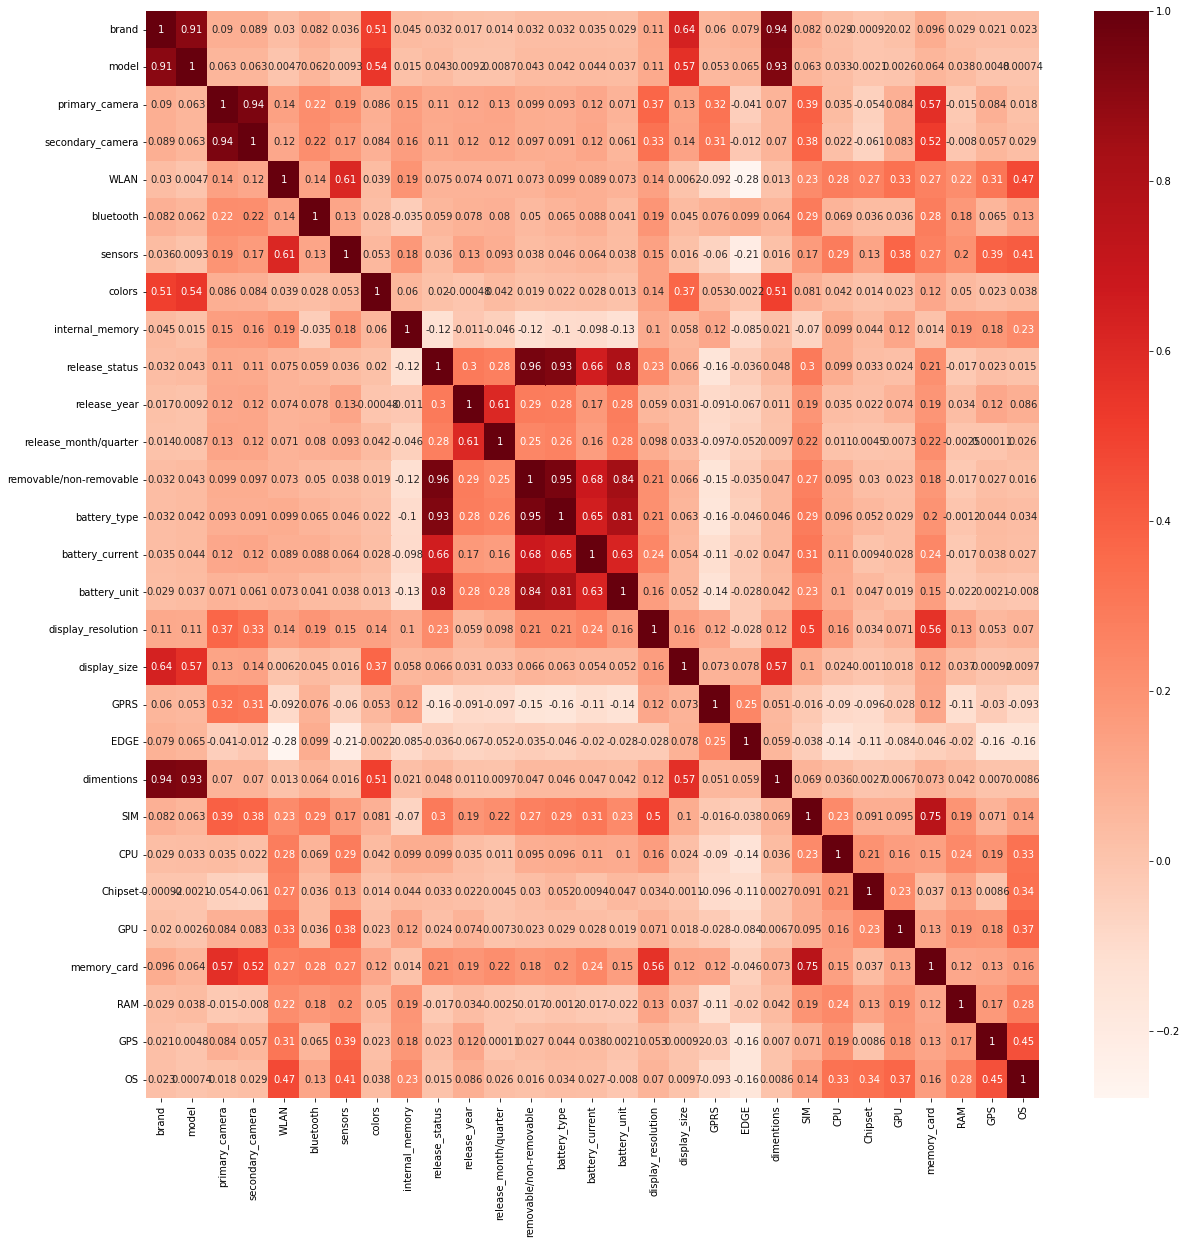

In [95]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = imputed_X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [90]:
#check for null values in train set
imputed_X_train.isnull().sum()

brand                      0
model                      0
primary_camera             0
secondary_camera           0
WLAN                       0
bluetooth                  0
sensors                    0
colors                     0
internal_memory            0
release_status             0
release_year               0
release_month/quarter      0
removable/non-removable    0
battery_type               0
battery_current            0
battery_unit               0
display_resolution         0
display_size               0
GPRS                       0
EDGE                       0
dimentions                 0
SIM                        0
CPU                        0
Chipset                    0
GPU                        0
memory_card                0
RAM                        0
GPS                        0
OS                         0
dtype: int64

In [91]:
#check for null values in test set
imputed_X_test.isnull().sum()

brand                      0
model                      0
primary_camera             0
secondary_camera           0
WLAN                       0
bluetooth                  0
sensors                    0
colors                     0
internal_memory            0
release_status             0
release_year               0
release_month/quarter      0
removable/non-removable    0
battery_type               0
battery_current            0
battery_unit               0
display_resolution         0
display_size               0
GPRS                       0
EDGE                       0
dimentions                 0
SIM                        0
CPU                        0
Chipset                    0
GPU                        0
memory_card                0
RAM                        0
GPS                        0
OS                         0
dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(imputed_X_train, Y_train)
predictions = lr_model.predict(imputed_X_test)

mae = mean_absolute_error(predictions, Y_test)
r2score = r2_score(Y_test, predictions)

print("Validation MAE for Linear Regression Model: {}".format(mae))
print("Validation Accuracy for Linear Regression Model: {}".format(r2score))

output = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
output.head(20)

Validation MAE for Linear Regression Model: 26.58049762585945
Validation Accuracy for Linear Regression Model: 0.9790873208243639


,Actual,Predicted
0,30.000000,105.120482
1,162.028777,160.238568
2,50.000000,159.342071
3,162.028777,168.618484
4,162.028777,129.216649
5,162.028777,165.070265
6,162.028777,161.197100
7,162.028777,160.230131
8,162.028777,127.852307
9,162.028777,177.647735


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# To improve accuracy, create a new Random Forest model and train on the data
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(imputed_X_train, Y_train)
predictions = rf_model.predict(imputed_X_test)

mae = mean_absolute_error(predictions, Y_test)
r2score = r2_score(Y_test, predictions)

print("Validation MAE for Random Forest Model: {}".format(mae))
print("Validation Accuracy for Random Forest Model: {}".format(r2score))

output = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
output.head(20)

Validation MAE for Random Forest Model: 13.053643491845738
Validation Accuracy for Random Forest Model: 0.9879485840018188


,Actual,Predicted
0,30.000000,31.920288
1,162.028777,159.547626
2,50.000000,159.788201
3,162.028777,162.028777
4,162.028777,111.517266
5,162.028777,158.286763
6,162.028777,158.967914
7,162.028777,162.028777
8,162.028777,102.830360
9,162.028777,162.028777


In [94]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000)
# Add silent=True to avoid printing out updates with each cycle
xgb_model.fit(imputed_X_train, Y_train, verbose=False)
predictions = xgb_model.predict(imputed_X_test)

mae = mean_absolute_error(predictions, Y_test)
r2score = r2_score(Y_test, predictions)

print("Validation MAE for XGBoost Model: {}".format(mae))
print("Validation Accuracy for XGBoost Model: {}".format(r2score))

output = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
output.head(20)

[18:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MAE for XGBoost Model: 14.324924849637798
Validation Accuracy for XGBoost Model: 0.9894492597313664


,Actual,Predicted
0,30.000000,38.104492
1,162.028777,163.120514
2,50.000000,144.804321
3,162.028777,163.902084
4,162.028777,112.209572
5,162.028777,162.815918
6,162.028777,157.671082
7,162.028777,161.054382
8,162.028777,106.292397
9,162.028777,156.746552
